In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1- Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
df = pd.read_csv('../datos/historico_tickets_limpio_pandas.csv', index_col = 0)

In [5]:
df.sample(3)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
9728,SDREST-8642927761,2017-07-11,1116,7,Sistema,Problema,3 - Mayor,0 - Sin Asignar,6,4,2º semestre,2017,Julio
8544,KHLTNT-9043242385,2018-05-22,848,43,Acceso/Login,Solicitud,2 - Normal,3 - Alta,0,4,1 semestre,2018,Mayo
10674,KMLTER-2343552568,2019-03-28,416,25,Software,Solicitud,2 - Normal,2 - Media,2,4,1 semestre,2019,Marzo


In [6]:
df.shape

(97386, 13)

2- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:
    - Crear un subplot con dos gráficas.
    - En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
    - En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

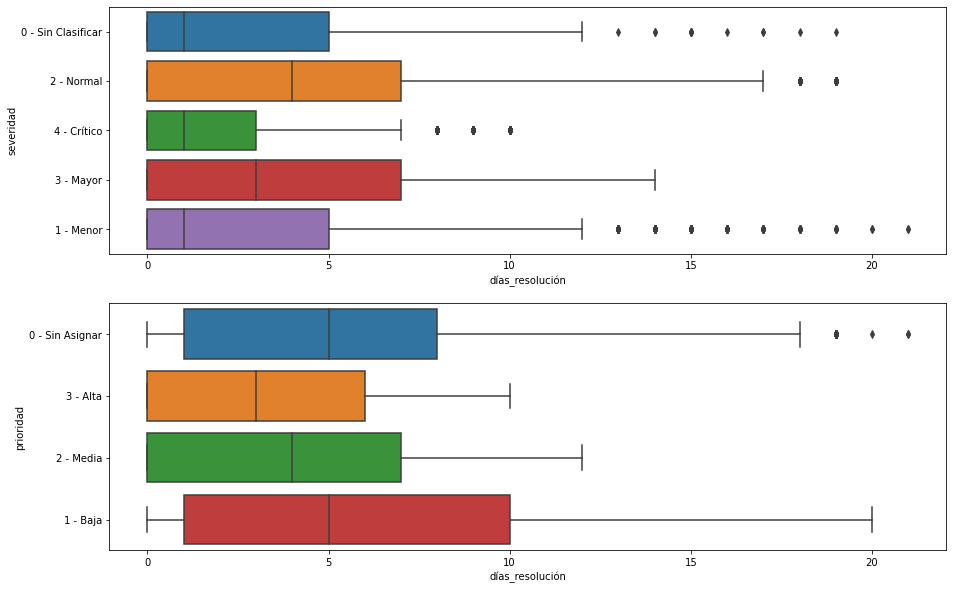

In [7]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x = 'días_resolución', y = 'severidad', data = df, ax = ax[0])
sns.boxplot(x = 'días_resolución', y = 'prioridad', data = df, ax = ax[1])

ax[0].set(ylabel = 'severidad')
ax[1].set(ylabel = 'prioridad')

plt.show();

    - Respecto a la severidad: Identificamos que los tikets clasificados como críticos son los que se priorizan respecto a días de resoluciónn frente a los demás, existiendo unos pocos outlieres que siguen manteniendose en una franja razonable de días de resolución respecto a los demás y que podrían justificarse por la dificultad.

    - Respecto a la prioridad: Encontramos que los días de resolución menores corresponden con aquelñlos categorizados como prioridad alta, lo que es coherente también con la asignación de severidad.

- HIPÓTESIS INICIAL: Podemos concluir que la hipótesis de partida ' ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?', se confirma con nuestros datos

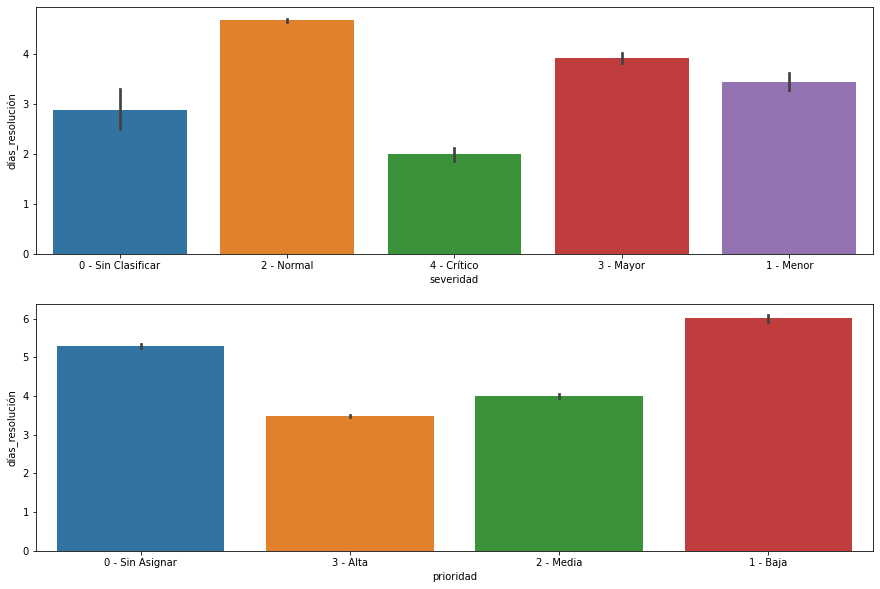

In [8]:
fig, ax = plt.subplots(2,1)

sns.barplot(x = 'severidad', y = 'días_resolución', data = df, ax = ax[0])
sns.barplot(x = 'prioridad', y = 'días_resolución', data = df, ax = ax[1])

plt.show();

--------------------------------------------------------------------------

- En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:
    - Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
    - Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [9]:
df.columns

Index(['id_ticket', 'fecha', 'id_empleado', 'id_agente', 'categoría', 'tipo',
       'severidad', 'prioridad', 'días_resolución', 'satisfacción', 'semestre',
       'año', 'mes'],
      dtype='object')

In [10]:
df_filtrado = df[df['categoría'].isin(['Acceso/Login', 'Software'])]

In [11]:
df_filtrado.sample(4)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
12877,SDLTER-8643662949,2019-07-16,724,39,Software,Solicitud,2 - Normal,0 - Sin Asignar,16,5,2º semestre,2019,Julio
8486,KHLENR-5043540280,2019-03-16,358,42,Acceso/Login,Problema,2 - Normal,3 - Alta,0,1,1 semestre,2019,Marzo
3622,GMRTNR-6042836450,2017-04-11,1955,34,Acceso/Login,Solicitud,1 - Menor,2 - Media,0,5,1 semestre,2017,Abril
4493,GHLTNR-9044028973,2020-07-16,1087,39,Acceso/Login,Solicitud,2 - Normal,3 - Alta,0,5,2º semestre,2020,Julio


In [12]:
df_filtrado.shape

(48708, 13)

<AxesSubplot:xlabel='categoría', ylabel='count'>

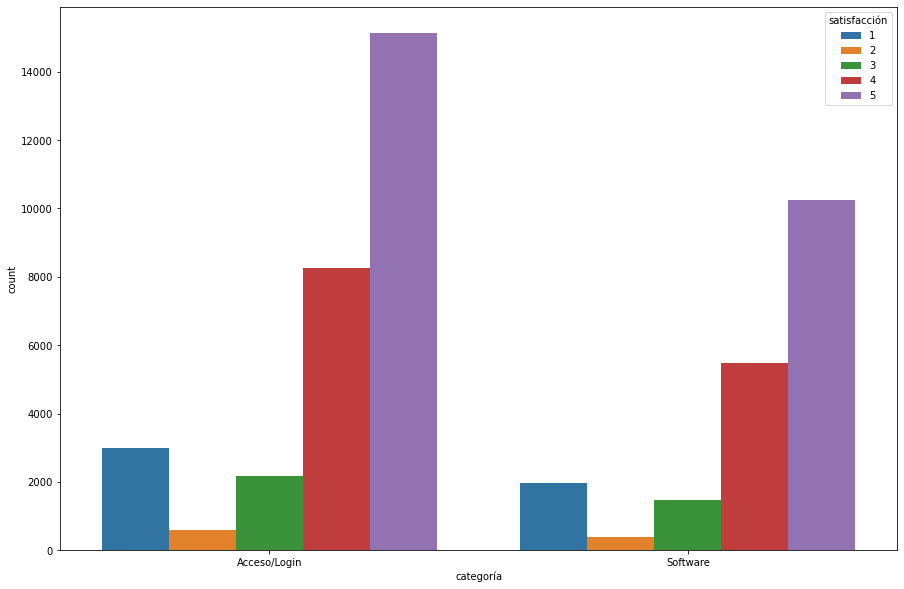

In [13]:
sns.countplot(x = 'categoría', hue = 'satisfacción', data = df_filtrado)

<AxesSubplot:xlabel='categoría', ylabel='satisfacción'>

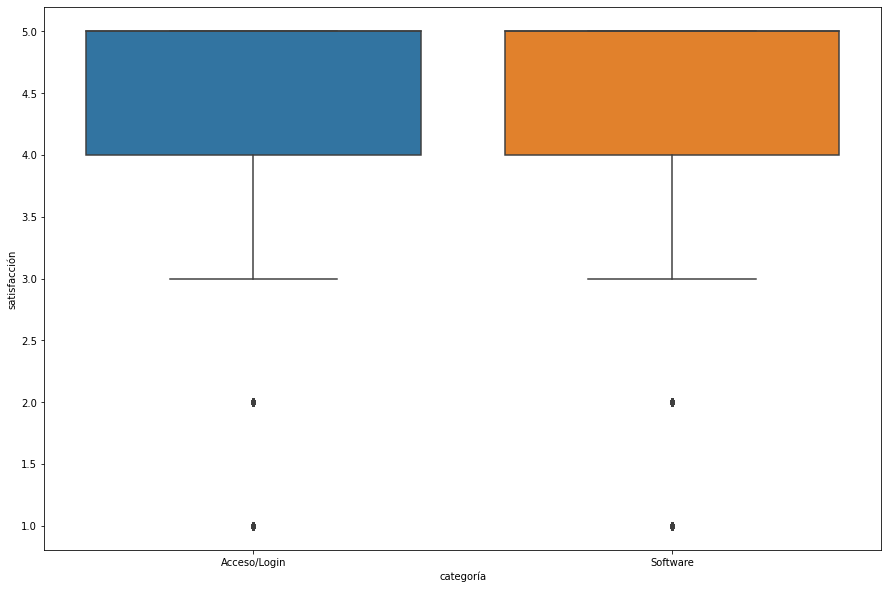

In [14]:
sns.boxplot(x = 'categoría', y = 'satisfacción', data = df_filtrado)

    - Para ambos tipos de categoría la distribución respecto a la satisfacción es similar. Destaca la máxima puntuación (5) en ambas categorías.
- HIPOTESIS INICIAL: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software? El grado de satisfacción es similar, si tenemos en cuenta que hay unas 10.000 registros de diferencia entre un tipo de incidencia y otro. La satisfacción es en general alta para ambos tipos de categoría.

---------------------------------------------------------------

- En la tercera gráfica contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?.

    Para contestar a esto haremos 3 gráficas independientes:

In [15]:
df.sample(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
14947,KMLTSR-0643997185,2020-06-15,1518,31,Sistema,Solicitud,2 - Normal,2 - Media,6,5,1 semestre,2020,Junio
28496,TWLTNR-0043875659,2020-02-14,45,16,Acceso/Login,Solicitud,2 - Normal,1 - Baja,0,5,1 semestre,2020,Febrero


- En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
    - Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.

In [16]:
# seleccionamos a los 10 empleados que más tikets gestionan
df_emloyees = df.groupby('id_empleado')['id_ticket'].count().reset_index().sort_values(by = 'id_ticket', ascending=False)

In [17]:
df_emloyees.head()

,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69


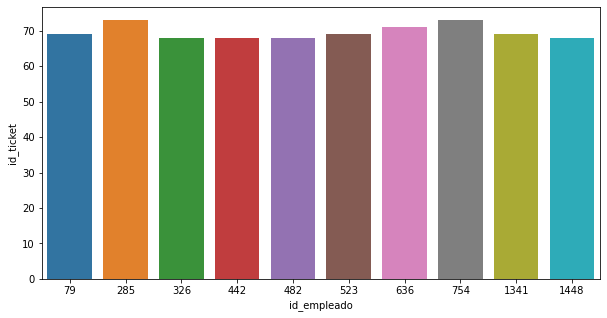

In [18]:
plt.figure(figsize = (10,5))

sns.barplot(x = 'id_empleado', y = 'id_ticket', data = df_emloyees.head(10))

plt.show();

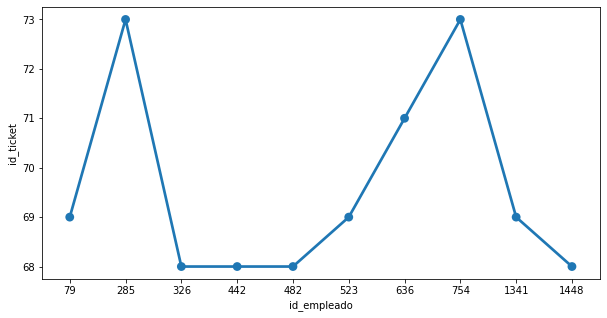

In [19]:
plt.figure(figsize = (10,5))

sns.pointplot(x = 'id_empleado', y = 'id_ticket', data = df_emloyees.head(10))

plt.show();

In [20]:
''' Porbamos a hacer un pointplot con el df completo, al ser tantos datos no aporta información
plt.figure(figsize = (20,5))

sns.pointplot(x = 'id_empleado', y = 'id_ticket', data = df_emloyees)

plt.show();
'''

" Porbamos a hacer un pointplot con el df completo, al ser tantos datos no aporta información\nplt.figure(figsize = (20,5))\n\nsns.pointplot(x = 'id_empleado', y = 'id_ticket', data = df_emloyees)\n\nplt.show();\n"

- En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
    - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
    - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
    - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

In [21]:
employees_more = (df_emloyees.head(10))

employees_less = df_emloyees.tail(10)

In [76]:
top = list(employees_more['id_empleado'].unique())

In [77]:
top

[754, 285, 636, 523, 79, 1341, 442, 326, 482, 1448]

In [75]:
employees_less['id_empleado'].unique()

array([1041, 1792,  607,  686, 1384, 1618,   72, 1195,   99,  793])

In [23]:
# creamos una lista con todos los IDs de empleado seleccionados
list_employees = []
list_employees.extend(list(employees_more['id_empleado'].unique()))
list_employees.extend(list(employees_less['id_empleado'].unique()))
list_employees

[754,
 285,
 636,
 523,
 79,
 1341,
 442,
 326,
 482,
 1448,
 1041,
 1792,
 607,
 686,
 1384,
 1618,
 72,
 1195,
 99,
 793]

In [41]:
len(list_employees)

20

In [42]:
employees_final = df[df['id_empleado'].isin(list_employees)]

In [26]:
employees_final.sample(3)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
17239,SDLTER-1443913662,2020-03-23,636,16,Software,Solicitud,2 - Normal,0 - Sin Asignar,4,1,1 semestre,2020,Marzo
14095,SHLEST-7143595524,2019-05-10,442,35,Sistema,Problema,2 - Normal,3 - Alta,1,4,1 semestre,2019,Mayo
11645,KWLTER-3343618137,2019-06-02,793,31,Software,Solicitud,2 - Normal,1 - Baja,3,3,1 semestre,2019,Junio


In [ ]:
employees_final.groupby('id_empleado')['id_']

In [38]:
employees_final.groupby('id_empleado').sum().sort_values(by = 'satisfacción', ascending = False).reset_index()

,id_empleado,días_resolución,satisfacción
0,285,392,316
1,754,272,297
2,79,349,294
3,1448,366,287
4,482,344,286
5,636,267,286
6,442,299,280
7,523,322,278
8,1341,258,275
9,326,358,268


In [ ]:
sns.countplot(x = 'id_empleado', hue = 'satisfacción', data = employees_final)

In [52]:
employees_less

,id_empleado,id_ticket
1040,1041,33
1791,1792,32
606,607,32
685,686,32
1383,1384,32
1617,1618,31
71,72,31
1194,1195,29
98,99,27
792,793,26


In [51]:
employees_final[employees_final['id_empleado'].isin(employees_less['id_empleado'].unique())]

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
164,GDLESR-1142419559,2016-02-19,1195,15,Sistema,Problema,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Febrero
335,GDLTER-4842696065,2016-11-22,686,30,Software,Solicitud,2 - Normal,0 - Sin Asignar,8,5,2º semestre,2016,Noviembre
497,GDLTNR-0042596921,2016-08-14,1792,29,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,2º semestre,2016,Agosto
612,GDLTNR-6042526866,2016-06-05,686,8,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
1594,GHLTER-9142371455,2016-01-02,1195,24,Hardware,Solicitud,2 - Normal,3 - Alta,10,5,1 semestre,2016,Enero
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28203,TWLESR-1944104924,2020-09-30,1792,49,Sistema,Problema,2 - Normal,1 - Baja,9,5,2º semestre,2020,Septiembre
28612,TWLTNR-5043948413,2020-04-27,1041,24,Acceso/Login,Solicitud,2 - Normal,1 - Baja,0,5,1 semestre,2020,Abril
28771,TWLTSR-1643891669,2020-03-01,686,26,Sistema,Solicitud,2 - Normal,1 - Baja,12,5,1 semestre,2020,Marzo
28980,TWLTSR-8843892525,2020-03-02,72,45,Sistema,Solicitud,2 - Normal,1 - Baja,8,5,1 semestre,2020,Marzo


In [ ]:
sns.countplot(x = 'id_empleado', y = , hue = 'satisfacción', data = employees_final)

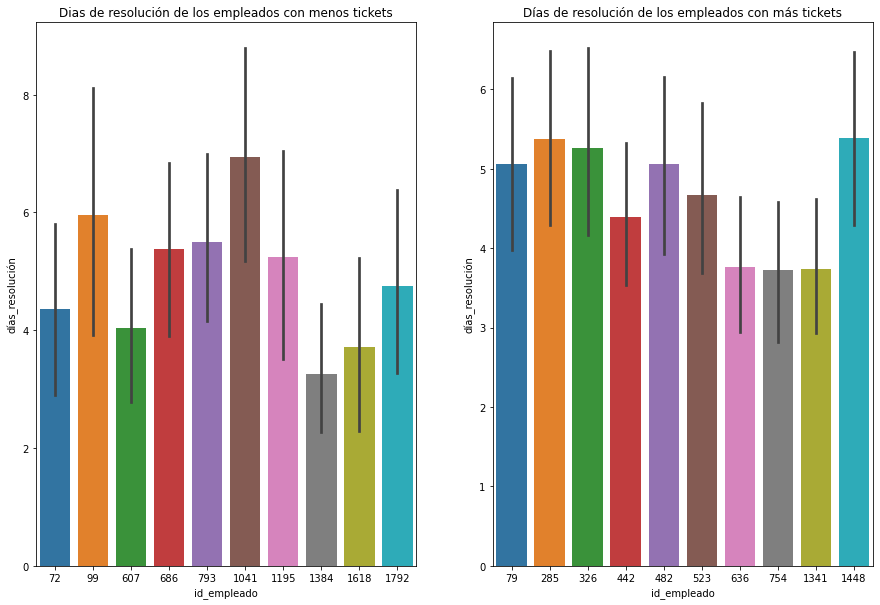

In [71]:
fig, ax = plt.subplots(1,2)

sns.barplot(x = 'id_empleado', y = 'días_resolución', ax = ax[0],data = employees_final[employees_final['id_empleado'].isin(employees_less['id_empleado'].unique())])
sns.barplot(x = 'id_empleado', y = 'días_resolución', ax = ax[1],data = employees_final[employees_final['id_empleado'].isin(employees_more['id_empleado'].unique())])

ax[0].set_title('Dias de resolución de los empleados con menos tickets')
ax[1].set_title('Días de resolución de los empleados con más tickets')

plt.show()

- Según los datos encontramos que los empleados que no hay una clara relación entre número de tickets y días de resolución. Sí existe una tendencia a que aquellos que gestionan menos tickets tardan algo más de tiempo en resolverlos, lo que explicaría el menor númeroi de tickets, pero no es así para todos los casos, encontándonos entre los 10 empleados con menos tickets resuletos que tardan menos días que la media en resolverlos, por lo que no podríamos explicar por tiempo de resolución el bajo numero de tickets resueltos.

- En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:
    - Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.


📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.

In [83]:
employees_final['categoría_empleados'] =  np.where(employees_final['id_empleado'].isin(top), 'top', 'down')

In [85]:
employees_final

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes,categoría_empleados
164,GDLESR-1142419559,2016-02-19,1195,15,Sistema,Problema,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Febrero,down
335,GDLTER-4842696065,2016-11-22,686,30,Software,Solicitud,2 - Normal,0 - Sin Asignar,8,5,2º semestre,2016,Noviembre,down
497,GDLTNR-0042596921,2016-08-14,1792,29,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,2º semestre,2016,Agosto,down
598,GDLTNR-5142539863,2016-06-18,636,18,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Junio,top
612,GDLTNR-6042526866,2016-06-05,686,8,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28771,TWLTSR-1643891669,2020-03-01,686,26,Sistema,Solicitud,2 - Normal,1 - Baja,12,5,1 semestre,2020,Marzo,down
28859,TWLTSR-4843970321,2020-05-19,482,43,Sistema,Solicitud,2 - Normal,1 - Baja,8,4,1 semestre,2020,Mayo,top
28958,TWLTSR-8243952987,2020-05-01,1448,9,Sistema,Solicitud,2 - Normal,1 - Baja,9,1,1 semestre,2020,Mayo,top
28980,TWLTSR-8843892525,2020-03-02,72,45,Sistema,Solicitud,2 - Normal,1 - Baja,8,5,1 semestre,2020,Marzo,down


<AxesSubplot:xlabel='días_resolución', ylabel='count'>

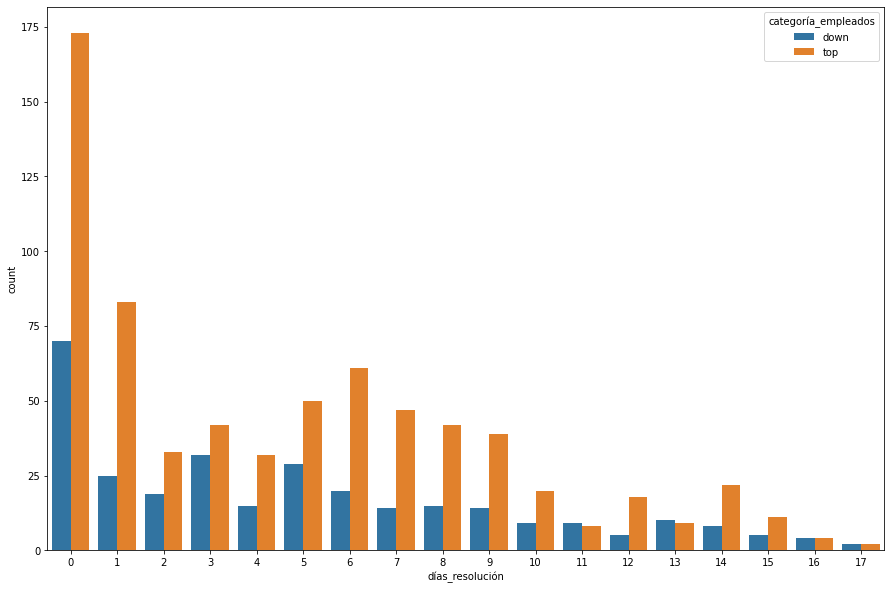

In [88]:
sns.countplot(x = 'días_resolución',  hue = 'categoría_empleados', data = employees_final)

<AxesSubplot:xlabel='categoría_empleados', ylabel='días_resolución'>

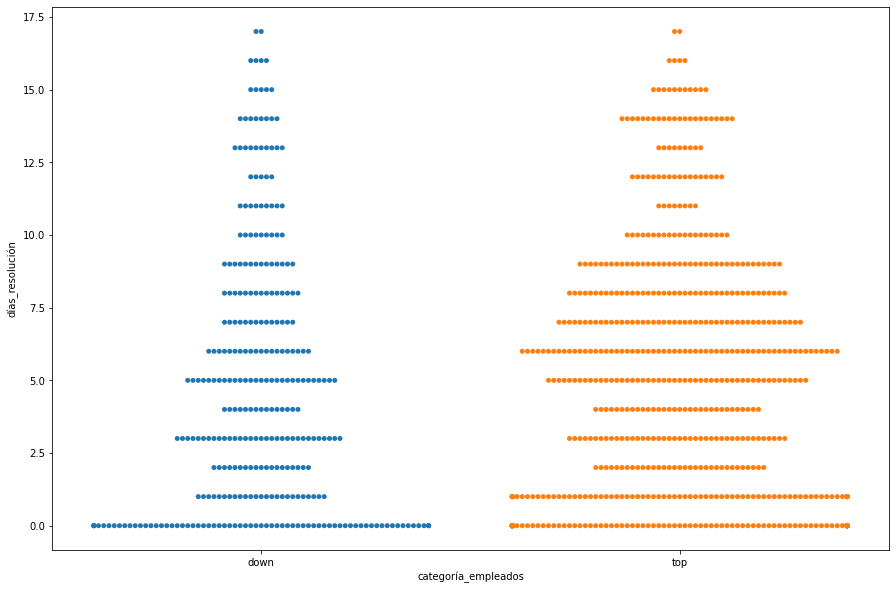

In [95]:
sns.swarmplot(x = 'categoría_empleados', y = 'días_resolución', data = employees_final)

<AxesSubplot:xlabel='satisfacción', ylabel='count'>

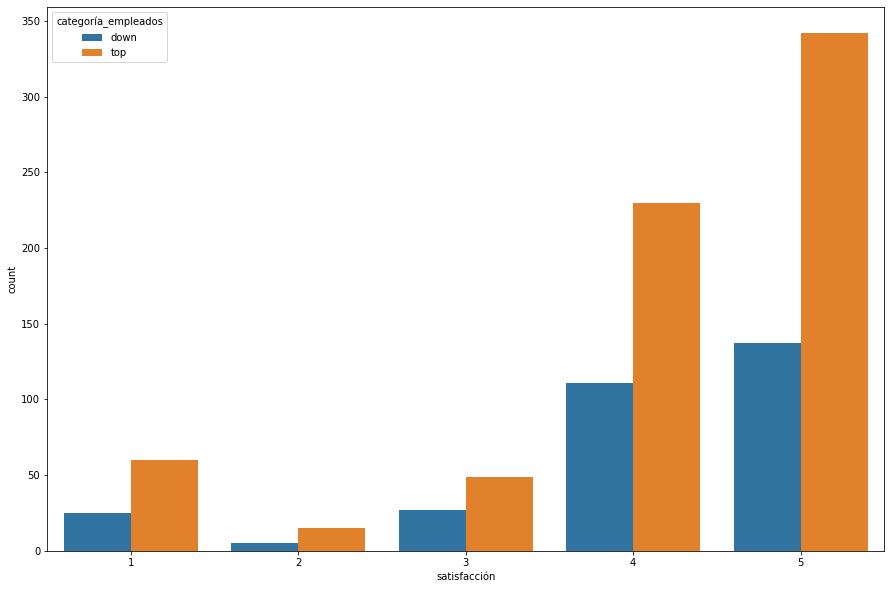

In [89]:
sns.countplot(x = 'satisfacción',  hue = 'categoría_empleados', data = employees_final)

<AxesSubplot:xlabel='categoría_empleados', ylabel='count'>

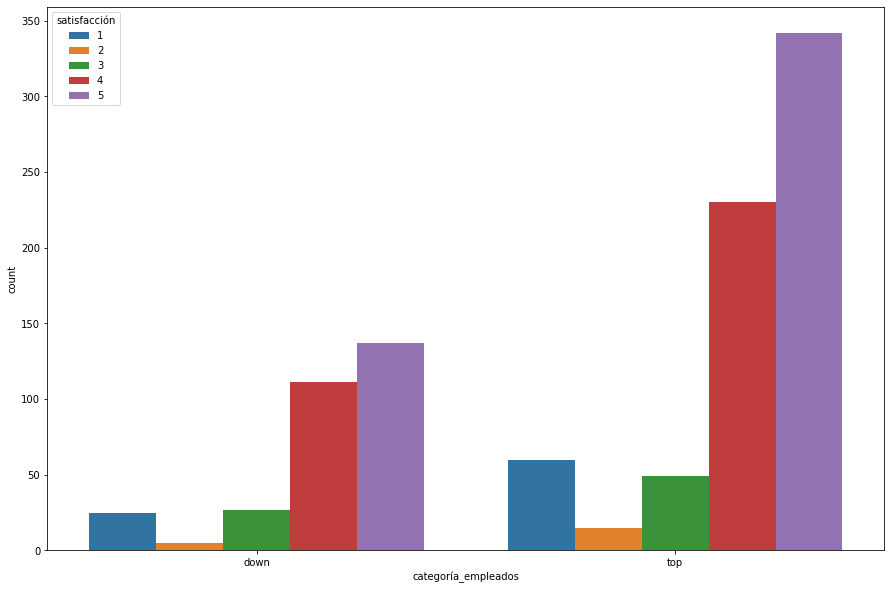

In [86]:
sns.countplot(x = 'categoría_empleados',  hue = 'satisfacción', data = employees_final)

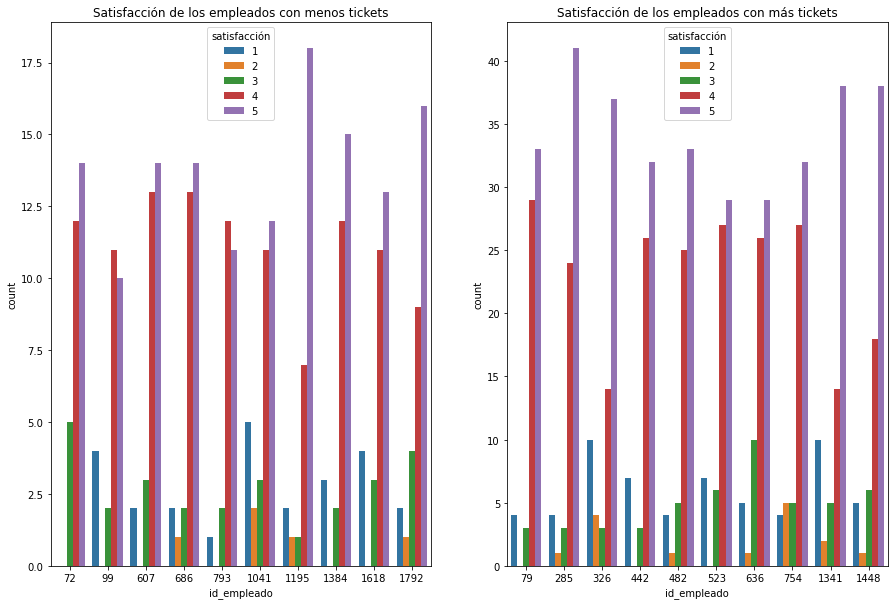

In [66]:
fig, ax = plt.subplots(1,2)

sns.countplot(x = 'id_empleado', hue = 'satisfacción', ax = ax[0],data = employees_final[employees_final['id_empleado'].isin(employees_less['id_empleado'].unique())])
sns.countplot(x = 'id_empleado', hue = 'satisfacción', ax = ax[1],data = employees_final[employees_final['id_empleado'].isin(employees_more['id_empleado'].unique())])

ax[0].set_title('Satisfacción de los empleados con menos tickets')
ax[1].set_title('Satisfacción de los empleados con más tickets')

plt.show()

Según los datos no parece que haya una relación clara entre el número de tickets y la satisfacción, por lo que no se podría explicar un menor numero de tickets gestionados por una mejor atención al cliente.